# Sentiment Analysis via the ML-based approach

Download the “Product Sentiment” dataset: sentiment_train.csv and sentiment_test.csv.

### Part 1.a. Loading and Prep

Load, clean, and preprocess the data as you find necessary.

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

df_train = pd.read_csv("sentiment_train.csv")

print(df_train.info())
print(df_train.head())

df_test = pd.read_csv("sentiment_test.csv")

print(df_train.info())
print(df_train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB
None
                                            Sentence  Polarity
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB

In [2]:
#Check for missing values
df_train.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

In [3]:
df_test.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

In [4]:
#Check for data imbalance
#Data set is not imbalanced, 50.5% are 0 and 49.5% are 1
df_train['Polarity'].value_counts()

0    1213
1    1187
Name: Polarity, dtype: int64

In [5]:
df_test['Polarity'].value_counts()

1    313
0    287
Name: Polarity, dtype: int64

In [6]:
#Checking for duplicates
sum(df_train.duplicated())

17

In [7]:
#Remove duplicates
df_train.drop_duplicates(keep='first')

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2395,Almost all of the songs in Cover Girl are old-...,0
2396,The most annoying thing about 'Cover Girl' is ...,0
2397,"Unfortunately, 'Cover Girl' is an example of h...",0
2398,Non-linear narration thus many flashbacks and ...,1


In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
# convert df_train['Sentence'] into list
text = list(df_train['Sentence'])

In [10]:
corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [11]:
# check first document in cleaned corpus
print(corpus[0])

wow loved place


In [12]:
# Create Feature and Label sets
X = corpus  
y = df_train['Polarity']

In [13]:
# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(1608, 2789)

In [15]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer()

In [16]:
# fit transform the TfidfVectorizer
#X_train_tfidf = tfidf.fit_transform(X_train)

### Part 1.b. Modeling

Use your favorite ML algorithm to train a classification model.  Don’t forget everything that we’ve learned in our ML course: hyperparameter tuning, cross validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing classifier that you can.

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

LogisticRegression()

In [18]:
from sklearn import metrics

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# Create a prediction set:
predictions = lr.predict(X_test_cv)

# confusion matrix
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['1','0'], columns=['1','0'])
df

,1,0
1,322,66
0,98,306


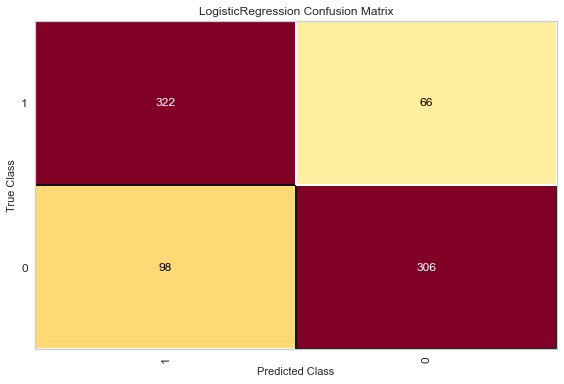

In [19]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr, classes=['1', '0'])
cm.fit(X_train_cv, y_train)
cm.score(X_test_cv, y_test)
cm.show();

In [20]:
# classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       388
           1       0.82      0.76      0.79       404

    accuracy                           0.79       792
   macro avg       0.79      0.79      0.79       792
weighted avg       0.80      0.79      0.79       792



### Logistic Regression Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
#To generate all available unique keys for the grid parameters
sorted(lr.get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [23]:
import sklearn

In [24]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [25]:
parameters = {'multi_class': ['multinomial'], 'class_weight': ['balanced'], 'n_jobs': [5],
          'penalty': ['l2'],
          'C':[100, 10, 1.0, 0.1, 0.01],
          'solver': ['saga'],
          'random_state': [12345]
              
         }

In [26]:
dt1 = GridSearchCV(estimator = lr, 
               param_grid = parameters,
               n_jobs = 4,
              scoring = 'accuracy'
)

In [27]:
dt1.fit(X_train_cv, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'n_jobs': [5],
                         'penalty': ['l2'], 'random_state': [12345],
                         'solver': ['saga']},
             scoring='accuracy')

In [28]:
predictions1 = dt1.predict(X_test_cv)

In [29]:
# classification report
print(metrics.classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       388
           1       0.80      0.76      0.78       404

    accuracy                           0.78       792
   macro avg       0.78      0.78      0.78       792
weighted avg       0.78      0.78      0.78       792



### Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gb = GradientBoostingClassifier()


In [32]:
gb.fit(X_train_cv, y_train)

GradientBoostingClassifier()

In [33]:
from sklearn import metrics

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# Create a prediction set:
predictions2 = gb.predict(X_test_cv)

# confusion matrix
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions2), index=['1','0'], columns=['1','0'])
df

,1,0
1,351,37
0,154,250


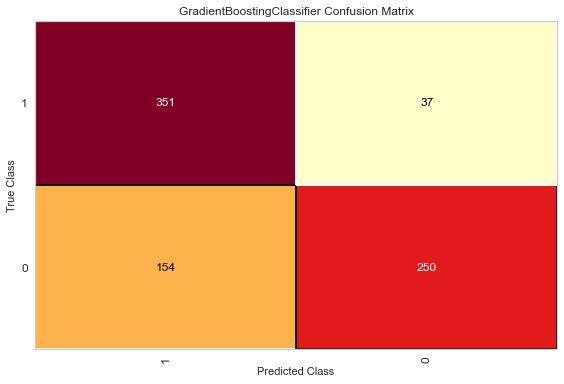

In [34]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(gb, classes=['1', '0'])
cm.fit(X_train_cv, y_train)
cm.score(X_test_cv, y_test)
cm.show();

In [35]:
# classification report
print(metrics.classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       388
           1       0.87      0.62      0.72       404

    accuracy                           0.76       792
   macro avg       0.78      0.76      0.75       792
weighted avg       0.78      0.76      0.75       792



### Part 1.c. Assessing

Use the testing data to measure the accuracy and F1-score of your model.  

### Preprocess test set

In [36]:
# convert data['Text'] into list
text2 = list(df_test['Sentence'])

In [37]:
corpus2 = []

for i in range(len(text2)):
    r = re.sub('[^a-zA-Z]', ' ', text2[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus2.append(r)

In [38]:
# check first document in cleaned corpus
print(corpus2[53])

even good camp value


In [39]:
# Create Feature and Label sets
X_validation = corpus2  
y_validation = df_test['Polarity']

In [40]:
# transform X_validation using CV
X_validation_cv = cv.transform(X_validation)

### Logisitic Regression Basic Model

In [41]:
# Create a prediction set:
pred_validation = lr.predict(X_validation_cv)

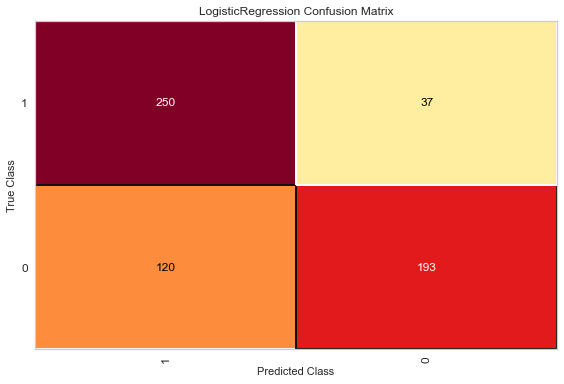

In [42]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr, classes=['1', '0'])
cm.fit(X_train_cv, y_train)
cm.score(X_validation_cv, y_validation)
cm.show();

In [43]:
# classification report
print(metrics.classification_report(y_validation,pred_validation))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       287
           1       0.84      0.62      0.71       313

    accuracy                           0.74       600
   macro avg       0.76      0.74      0.74       600
weighted avg       0.76      0.74      0.73       600



### Logisitic Regression Tuned Model

In [44]:
# Create a prediction set:
pred_validation2 = dt1.predict(X_validation_cv)

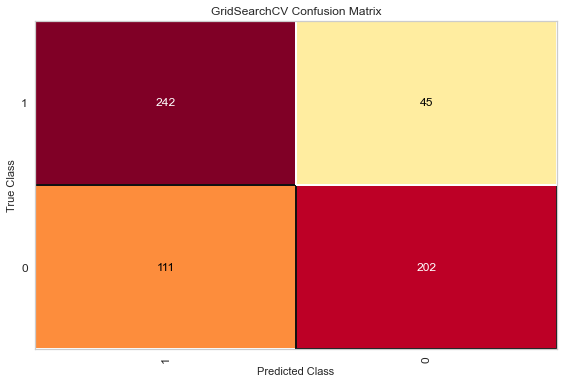

In [45]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(dt1, classes=['1', '0'])
cm.fit(X_train_cv, y_train)
cm.score(X_validation_cv, y_validation)
cm.show();

In [46]:
# classification report
print(metrics.classification_report(y_validation,pred_validation2))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       287
           1       0.82      0.65      0.72       313

    accuracy                           0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600



### Part 2. Given the accuracy and F1-score of your model, are you satisfied with the results, from a business point of view? Explain.

Defining what makes a 'good' prediction' depends on the use case and should also be agreed upon with the business. However, I would be satisfied with the results. 

The accuracy and F1-score for the test set is 78% versus 74% for the validation/holdout set. Using just the default parameters of the logistic regression classifier, the accuracy and f1-score is 79%, thus hyperparameter tuning helped to reduce overfitting. The basic logistic regression algorithm has slightly better performance than the basic gradient boosting algorithm. A potential explanation for this is that the logistic regression model is simplier than gradient boosting, therefore it generalizes better to new data. 

Because we are predicting review sentiment and not diagnosing cancer, the cost of getting the prediction wrong is much lower. More than 70% of the time, the model is getting the prediction right. Because the dataset is well-balanced, accuracy is an appropriate metric in this case. This is also likely why accuracy and F1 scores are the same. It would be a different story if the data were 99% positive sentiment and only 1% negative sentiment. The model would probably achieve an accuracy of 99%, but only because 99% is the lowest acceptable accuracy for the data and the start from which the model can be improved. 

### Part 3. Show five example instances in which your model’s predictions were incorrect. Describe why you think the model was wrong. Don’t just guess: dig deep to figure out the root cause.

Example 1 (Row 5):I rather enjoyed it.  
This instance has been classified as 0 (negative) but should be 1 (positive). 

Example 2 (Row 8):It really created a unique feeling though.  
This instance has been classified as 0 (negative) but should be 1 (positive). 

Example 3 (Row 12): Not too screamy not to masculine but just right.  
This instance has been classified as 0 (negative) but should be 1 (positive). 

Example 4 (Row 13): The camera really likes her in this movie.
This instance has been classified as 0 (negative) but should be 1 (positive). 

Example 5 (Row 53): Not even good for camp value!  
This instance has been classified as 1 (positive) but should be 0 (negative).

An hypothesis for why the model was wrong could be that it did not pick up on the context around some words.This coule because the preprocessing might have removed some key words for the model to learn the context. For instance, Example 5 before preprocessing is "Not even good for camp value!" However, after preprocessing becomes "even good camp value." Thus, the stop word removed took out "Not" which is an important words for the model to learn the context of the sentence.  A potential solution is to incorporate n-grams into the preprocessing phase. 

Another reason could that very common words are used frequently across both the train and validation dataset which makes it more difficult for the model to learn which words are more important in making a correction prediction. Refer to the word clouds for both data sets in the code below. A potential solution is to add the most frequent words to the stop words list when they were removed as part of the preprocessing phase. 

Lastly, it could be that there are some words in the train set that are not included in the test set so the model was not able to learn from that data. 

In [47]:
for row_index, (input, prediction, label) in enumerate(zip (X_validation, pred_validation2, y_validation)):
  if prediction != label:
    print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)

Row 5 has been classified as  0 and should be  1
Row 8 has been classified as  0 and should be  1
Row 12 has been classified as  0 and should be  1
Row 13 has been classified as  0 and should be  1
Row 14 has been classified as  0 and should be  1
Row 36 has been classified as  0 and should be  1
Row 38 has been classified as  0 and should be  1
Row 43 has been classified as  0 and should be  1
Row 46 has been classified as  0 and should be  1
Row 48 has been classified as  0 and should be  1
Row 49 has been classified as  0 and should be  1
Row 53 has been classified as  1 and should be  0
Row 67 has been classified as  0 and should be  1
Row 77 has been classified as  1 and should be  0
Row 80 has been classified as  1 and should be  0
Row 81 has been classified as  1 and should be  0
Row 86 has been classified as  0 and should be  1
Row 87 has been classified as  0 and should be  1
Row 89 has been classified as  1 and should be  0
Row 90 has been classified as  0 and should be  1
Ro

In [48]:
# convert X_array into pandas dataframe
df = pd.DataFrame(pred_validation2)
df

,0
0,1
1,1
2,1
3,1
4,1
...,...
595,0
596,0
597,0
598,0


In [51]:
#export to CSV
df.to_csv('pred_validation2.csv', index=False)

There are 146182 words in the combination of all Sentences.


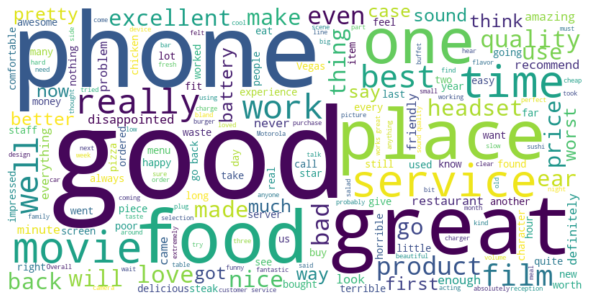

In [52]:
from wordcloud import WordCloud,ImageColorGenerator

import matplotlib.pyplot as plt

#making of word cloud from Sentence column
text = " ".join(topic for topic in df_train.Sentence.astype(str))
print ("There are {} words in the combination of all Sentences.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 52501 words in the combination of all Sentences.


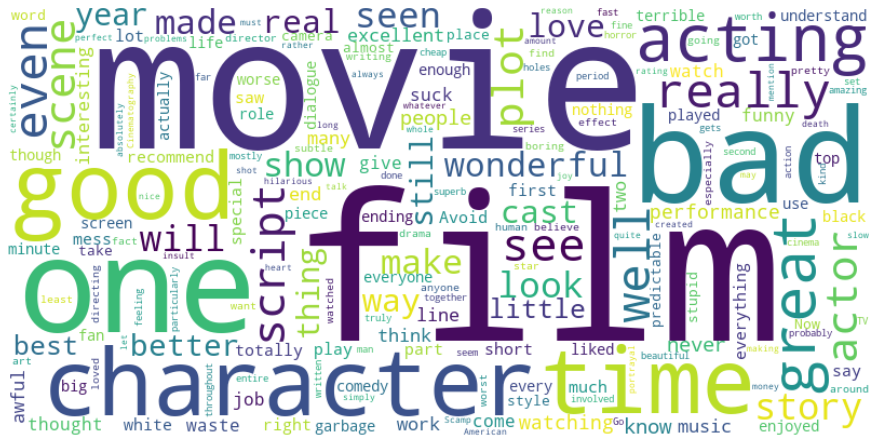

In [53]:
from wordcloud import WordCloud,ImageColorGenerator

import matplotlib.pyplot as plt

#making of word cloud from Sentence column
text = " ".join(topic for topic in df_test.Sentence.astype(str))
print ("There are {} words in the combination of all Sentences.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [59]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.
